In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.datasets import make_classification

In [47]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [48]:
pd.DataFrame(X)[0]

0     -0.688430
1     -2.833959
2      2.562914
3      0.470123
4     -1.135109
         ...   
995    0.525380
996    1.119683
997    0.395610
998   -0.209471
999    0.395984
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

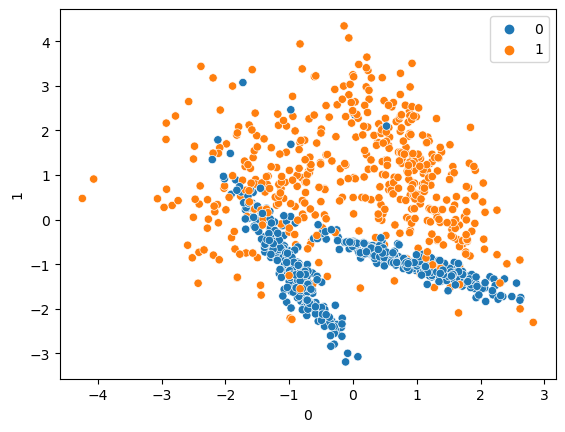

In [49]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 10)

In [51]:
from sklearn.svm import SVC

In [52]:
classifier = SVC(kernel='linear')


In [53]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [54]:
classifier.coef_

array([[0.32423108, 1.51988776]])

In [55]:
classifier.coef0

0.0

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
from sklearn.metrics import classification_report, accuracy_score
SVC(

In [58]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       145
           1       0.82      0.97      0.89       105

    accuracy                           0.90       250
   macro avg       0.90      0.91      0.90       250
weighted avg       0.91      0.90      0.90       250



## Hyper parameter Tuning

In [59]:
parameters = {
   'C': [1,2,3,4,5],
    'gamma': [1,0.1,0.01,0.001,0.0001],
     'kernel':['linear']
}

In [60]:
from sklearn.model_selection import GridSearchCV


In [61]:
clf = GridSearchCV(SVC(),cv=5,param_grid=parameters,refit=True,verbose=3)

In [62]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.867 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.840 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.867 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.840 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [63]:
y_pred = clf.predict(X_test)

In [65]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       145
           1       0.82      0.97      0.89       105

    accuracy                           0.90       250
   macro avg       0.90      0.91      0.90       250
weighted avg       0.91      0.90      0.90       250

